In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\Lenovo\1代码_PSG课题\代码上传\data\figure4c_psdloo.xlsx',
                  index_col = [0])
df_two = pd.read_excel(r'C:\Users\Lenovo\1代码_PSG课题\代码上传\data\figure4c_cross.xlsx',
                  index_col = [0])
sf = genfromtxt(r'C:\Users\Lenovo\1代码_PSG课题\代码上传\data\figure4d_sf.txt', delimiter=',')

In [3]:
base = pd.DataFrame({'acc': df['base']})
psd = pd.DataFrame({'acc': df['psd']})
loo = pd.DataFrame({'acc': df['loo']})
cross = pd.DataFrame({'acc': df_two['cross']})
self = pd.DataFrame({'acc': df_two['self']})

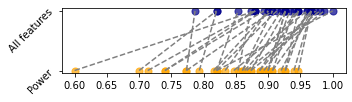

In [4]:
# base and psd
# plotting the points
fig, ax = plt.subplots(figsize=(5 ,1.5))
plt.scatter(base['acc'],np.ones(len(base['acc'])), color = 'darkblue',s = 50, alpha = 0.7)
plt.scatter(psd['acc'], np.zeros(len(base['acc'])), color = 'orange',s = 50, alpha = 0.7)
# plotting the lines
for i in range(len(base['acc'])):
    plt.plot( [psd['acc'][i],base['acc'][i]],[0,1], c='gray', linestyle='--' )
plt.yticks([0,1], ['Power','All features'],rotation = 45)
plt.tight_layout()

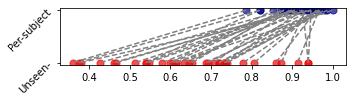

In [5]:
# base and loo
# plotting the points
fig, ax = plt.subplots(figsize=(5 ,1.5))
plt.scatter(base['acc'],np.ones(len(base['acc'])), color = 'darkblue',s = 50, alpha = 0.7)
plt.scatter(loo['acc'], np.zeros(len(base['acc'])), color = 'red',s = 50, alpha = 0.7)
# plotting the lines
for i in range(len(base['acc'])):
    plt.plot( [loo['acc'][i],base['acc'][i]],[0,1], c='gray', linestyle='--' )

plt.yticks([0,1], ['Unseen-','Per-subject'],rotation = 45)
plt.tight_layout()

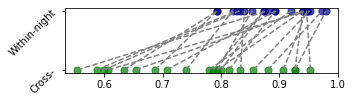

In [6]:
# within night vs cross night
# plotting the points
fig, ax = plt.subplots(figsize=(5 ,1.5))
plt.scatter(self['acc'],np.ones(len(self['acc'])), color = 'darkblue',s = 50, alpha = 0.7)
plt.scatter(cross['acc'], np.zeros(len(self['acc'])), color = 'green',s = 50, alpha = 0.7)
# plotting the lines
for i in range(len(self['acc'])):
    plt.plot( [cross['acc'][i],self['acc'][i]],[0,1], c='gray', linestyle='--' )

plt.yticks([0,1], ['Cross-','Within-night'],rotation = 45)
plt.tight_layout()

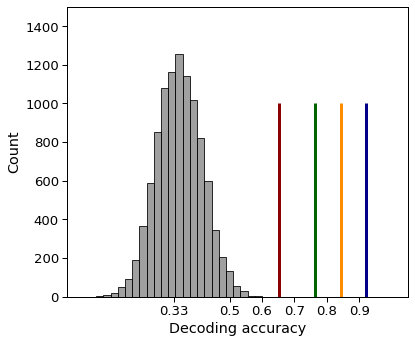

In [7]:
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(6 ,5))
plot = sns.histplot(sf, ax =ax, bins = 23, color = 'gray')
# base 
plt.vlines(x= base['acc'].mean(),ymin = 0,
           ymax = 1000, color='darkblue', linestyle='-',linewidth = 3)
# psd
plt.vlines(x= psd['acc'].mean(),ymin = 0,
           ymax = 1000, color='darkorange', linestyle='-',linewidth = 3)
# loo
plt.vlines(x= loo['acc'].mean(),ymin = 0,
           ymax = 1000, color='darkred', linestyle='-',linewidth = 3)
# cross-night
plt.vlines(x=cross['acc'].mean(),ymin = 0,
           ymax = 1000, color='darkgreen', linestyle='-',linewidth = 3)
plot.set(xlabel='Decoding accuracy', ylabel= 'Count',xticks = [0.33, 0.5 ,0.6 , 0.7, 0.8, 0.9],
         xlim = (0,1.05), ylim = (0, 1500))
ax.set_xticklabels([0.33, 0.5 ,0.6 , 0.7, 0.8, 0.9])
plt.tight_layout()